<a href="https://colab.research.google.com/github/Shyam-Khokhariya/ML-Python/blob/master/C13_Tensorflow_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
g=tf.Graph()

In [4]:
with g.as_default():
  x=tf.placeholder(dtype=tf.float32,shape=(None),name='x')
  w=tf.Variable(2.0,name='weight')
  b=tf.Variable(0.7,name='bias')
  z = x*w + b
  init=tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
with tf.Session(graph=g) as sess:
  sess.run(init)
  for t in [1.0,2,1.2,-0.2]:
    print("x=%4.1f--->z=%4.1f"%(t,sess.run(z,feed_dict={x:t})))

x= 1.0--->z= 2.7
x= 2.0--->z= 4.7
x= 1.2--->z= 3.1
x=-0.2--->z= 0.3


In [6]:
with tf.Session(graph=g) as sess:
  sess.run(init)
  print(sess.run(z,feed_dict={x:[1,2,2.1]}))

[2.7       4.7       4.8999996]


In [0]:
import numpy as np
import tensorflow as tf
g=tf.Graph()
with g.as_default():
  x=tf.placeholder(dtype=tf.float32,shape=(None,2,3),name='x')
  x2=tf.reshape(x,shape=(-1,6),name='x2')
  xsum=tf.reduce_sum(x2,axis=0,name='col_sum')
  xmean=tf.reduce_mean(x2,axis=0,name='col_mean')
  

In [9]:
with tf.Session(graph=g) as sess:
  X_array=np.arange(18).reshape(3,2,3)
  print("X:",X_array)
  print("Input Shape:",X_array.shape)
  print("Reshaped:",sess.run(x2,feed_dict={x:X_array}))
  print("Column Sum:",sess.run(xsum,feed_dict={x:X_array}))
  print("Column Mean:",sess.run(xmean,feed_dict={x:X_array}))
  

X: [[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]]]
Input Shape: (3, 2, 3)
Reshaped: [[ 0.  1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16. 17.]]
Column Sum: [18. 21. 24. 27. 30. 33.]
Column Mean: [ 6.  7.  8.  9. 10. 11.]


In [0]:
import numpy as np
import tensorflow as tf
X_train=np.arange(10).reshape((10,1))
y_train=np.array([1.0,1.2,3.1,2.3,4.0,4.2,5.0,4.8,6.0,8.0])

In [12]:
class TFLinreg(object):
  def __init__(self,x_dim,learning_rate=0.01,random_seed=None):
    self.x_dim=x_dim
    self.learning_rate=learning_rate
    self.g=tf.Graph()
    with self.g.as_default():
      tf.set_random_seed(random_seed)
      self.build()
      self.init_op=tf.global_variables_initializer()
  def build(self):
    self.X=tf.placeholder(dtype=tf.float32,shape=(None,self.x_dim),name='x_input')
    self.y=tf.placeholder(dtype=tf.float32,shape=(None),name='y_input')
    print(self.X)
    print(self.y)
    w=tf.Variable(tf.zeros(shape=(1)),name='weight')
    b=tf.Variable(tf.zeros(shape=(1)),name='bias')
    print(w)
    print(b)
    self.z_net=tf.squeeze(w*self.X+b,name='z_net')
    print(self.z_net)
    sqr_error=tf.square(self.y-self.z_net,name='sqr_error')
    print(sqr_error)
    self.mean_cost=tf.reduce_mean(sqr_error,name='mean_cost')
    optimizer=tf.train.GradientDescentOptimizer(learning_rate=self.learning_rate,name='GradientDesent')
    self.optimizer=optimizer.minimize(self.mean_cost)

lrmodel=TFLinreg(x_dim=X_train.shape[1],learning_rate=0.01)

Tensor("x_input:0", shape=(?, 1), dtype=float32)
Tensor("y_input:0", dtype=float32)
<tf.Variable 'weight:0' shape=(1,) dtype=float32_ref>
<tf.Variable 'bias:0' shape=(1,) dtype=float32_ref>
Tensor("z_net:0", dtype=float32)
Tensor("sqr_error:0", dtype=float32)
Instructions for updating:
Use tf.cast instead.


In [0]:
def train_linreg(sess,model,X_train,y_train,num_epochs=10):
  sess.run(model.init_op)
  training_cost=[]
  for i in range(num_epochs):
    _,cost=sess.run([model.optimizer,model.mean_cost],feed_dict={model.X:X_train,model.y:y_train})
    print(cost)
    training_cost.append(cost)
  return training_cost

In [22]:
sess=tf.Session(graph=lrmodel.g)
training_cost=train_linreg(sess,lrmodel,X_train,y_train)
print(training_cost)

19.902
3.8349717
1.0577357
0.57649684
0.49193662
0.47592354
0.47176892
0.46967822
0.46795988
0.46632105
[19.902, 3.8349717, 1.0577357, 0.57649684, 0.49193662, 0.47592354, 0.47176892, 0.46967822, 0.46795988, 0.46632105]


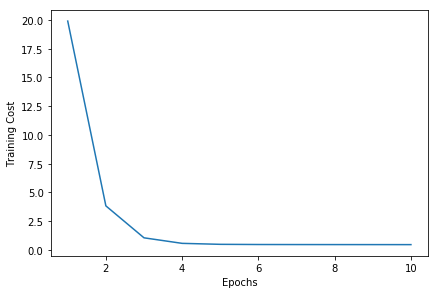

In [23]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(training_cost)+1),training_cost)
plt.tight_layout()
plt.xlabel("Epochs")
plt.ylabel("Training Cost")
plt.show()


In [0]:
def predict_linreg(sess,model,X_test):
  y_pred=sess.run(model.z_net,feed_dict={model.X:X_test})
  return y_pred

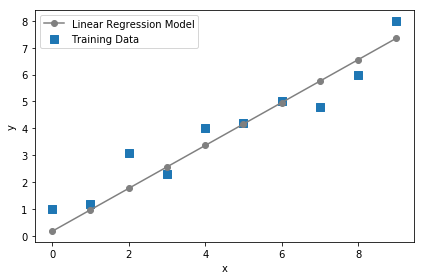

In [26]:
plt.scatter(X_train,y_train,marker='s',s=50,label="Training Data")
plt.plot(range(X_train.shape[0]),predict_linreg(sess,lrmodel,X_train),color='grey',marker='o',markersize=6,label='Linear Regression Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()